## Topic of the project:

The largest source of emissions of carbon dioxide (CO2, the most common greenhouse gas) in the majority of countries, especially developped countries,  is the transportation sector.
The CO2 emissions proportions can vary based on factors such as the vehicles fuel type, fuel economy, mileage and vehicles caracteristics.

Understanding the relationships between those features can guide decisions related to engine design, fuel efficiency improvements, and environmental impact. 
In this project, we have chosen a dataset that captures the details of how CO2 emissions by vehicles can vary with different features.

The dataset has been taken from Canada Government official open data website. It is also available in Kaggle website.
Link: https://www.kaggle.com/datasets/bhuviranga/co2-emissions


## Description of the variables used in this dataset:

The dataset includes 12 variables:


-Make : vehicle manufacturer


-Model : vehicle model


-Vehicle class : different vehicle classes, such as sedans, SUVs, trucks, or sports cars


-Engine Size (L) : size of engine


-Cylinders : engine cylinder


-Transmission : type of transmissison (automatic or manual transmission)


-Fuel Type : Type of fuel used by a vehicle


-Fuel Consumption City (L/100km) : fuel consumption of a vehicle in city


-Fuel Consumption Hwy (L/100 km) : fuel consumption of a vehicle in highway


-Fuel Consumption Comb (L/100 km) : fuel consumption of a vehicle in city and highway (combined) in unit liter per 100 kilometers.

-Fuel Consumption Comb (mpg) : fuel consumption of a vehicle in city and highway (combined) in unit miles per gallon.


-CO2 Emissions(g/km) : amount of CO2 gas emitted.

# CO2 Emissions analysis:

## 1. Importing libraries:

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import shapiro
from scipy.stats import pearsonr
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

from warnings import filterwarnings
filterwarnings('ignore')

## 2. Loading data

In [2]:
os.chdir('C:/Users/sanas/Downloads/CO2 Emission Dataset')

# load the dataset
data = pd.read_csv("CO2 Emissions.csv")

# view the first few rows
data.head()



,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## 3. Exploratory data analysis:

### 3.1. Discovering data:


In [3]:
# check the dimension of the dataset
data.shape


(7385, 12)

In [4]:
# columns names
data.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [5]:
# top overview of the data:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

Our dataset contains 7385 rows and 12 columns: 4 float columns, 3 integer columns  and 5 object columns. 

### 3.2. Data cleaning:

We will check if there are duplicated rows, rename certain columns and insert a new column. 

In [6]:
# check if our data contains NULL values and sum them
data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

So, our data doesn't include any missing values.

In [7]:
# check if there are duplicated rows in the dataset.
duplicate = data.duplicated().sum()
print('There are {} duplicated rows in the data'.format(duplicate))

There are 1103 duplicated rows in the data


In [8]:
# drop the duplicates.
data.drop_duplicates(inplace=True)

In [9]:
# reset indexes.
data.reset_index(inplace=True, drop=True)

In [10]:
# rename columns:
data = data.rename(columns={
    "Vehicle Class" : "Vehicle_Class",
    'Engine Size(L)': 'Engine_Size',
    'Fuel Type': 'Fuel_Type', 
    'Fuel Consumption City (L/100 km)': 'Fuel_Consumption_City',
    'Fuel Consumption Hwy (L/100 km)': 'Fuel_Consumption_Hwy',
    'Fuel Consumption Comb (L/100 km)': 'Fuel_Consumption_Comb',
    'Fuel Consumption Comb (mpg)': 'Fuel_Consumption_Comb2',
    'CO2 Emissions(g/km)' : 'CO2_Emissions'    
})

In [11]:
# insert a new column 'Transmission_Class' - ['Automatic', 'Manual'].
data['Transmission_Class'] = data['Transmission'].apply(lambda x: 'Automatic' if x.startswith('A') else 'Manual')

In [12]:
# drop a column that I see not useful:
data.drop(['Model'],axis=1,inplace=True)

In [13]:
# replace the values in column 'Fuel Type'.
data['Fuel_Type'] = data['Fuel_Type'].replace(['X', 'Z', 'E', 'D', 'N'], ['Regular Gasoline','Premium Gasoline','Ethanol','Diesel','Natural Gas'])

In [14]:
# move the column Transmission_Class column next to Transmission column. 
column_to_move = data.pop("Transmission_Class")  # Remove column "name" and store it
data.insert(6, "Transmission_Class", column_to_move)

Now, we can see how our data looks like after modifications:

In [15]:
# display the shape of our data after removing duplicates.
data.shape

(6282, 12)

In [16]:

data.head()

,Make,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Type,Transmission_Class,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb2,CO2_Emissions
0,ACURA,COMPACT,2.0,4,AS5,Premium Gasoline,Automatic,9.9,6.7,8.5,33,196
1,ACURA,COMPACT,2.4,4,M6,Premium Gasoline,Manual,11.2,7.7,9.6,29,221
2,ACURA,COMPACT,1.5,4,AV7,Premium Gasoline,Automatic,6.0,5.8,5.9,48,136
3,ACURA,SUV - SMALL,3.5,6,AS6,Premium Gasoline,Automatic,12.7,9.1,11.1,25,255
4,ACURA,SUV - SMALL,3.5,6,AS6,Premium Gasoline,Automatic,12.1,8.7,10.6,27,244


So, we have now a dataset with 6282 rows and 12 columns with no missing values and no duplicates. 

### 3.3. Data understanding:

In [17]:
data.describe()

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb2,CO2_Emissions
count,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000
mean,3.161812,5.618911,12.610220,9.070583,11.017876,27.411016,251.157752
std,1.365201,1.846250,3.553066,2.278884,2.946876,7.245318,59.290426
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


- The average amount of CO2 emitted from cars is 251 g/km.
- The average amount of Fuel Consumed by cars on city and Hwy is approximatly 11 L/100km.
-  The amount of fuel consumed by cars on city is comparitvely greater than that of highway.
- About 75% of the cars have 6 or less cylinders and less than 4L as engine size.
- The maximum Fuel consumed by cars on city and Hwy is about 26 L/100km.
- The maximum CO2 emitted by cars is 522 g/km.


We can calculate also the mode and tails of Fuel consumption and CO2 emissions for example.

In [18]:
fuel_consumption_comb = data['Fuel_Consumption_Comb']
print(f'  mode:{fuel_consumption_comb.mode()}')
print(f'Tails of fuel consumption_comb (Kurtosis): {kurtosis(fuel_consumption_comb)}')

  mode:0    9.4
Name: Fuel_Consumption_Comb, dtype: float64
Tails of fuel consumption_comb (Kurtosis): 1.3948085032827438


In [19]:
CO2_emissions = data['CO2_Emissions']
print(f'CO2_emissions  mode:{CO2_emissions.mode()}')
print(f'Tails of CO2 Emissions (Kurtosis): {kurtosis(CO2_emissions)}')

CO2_emissions  mode:0    221
1    246
Name: CO2_Emissions, dtype: int64
Tails of CO2 Emissions (Kurtosis): 0.43986442942205617


- The CO2 frequently emitted is about 221 g/km while the Fuel frequently consumed in the city roads and hwy (comb) is nearly 9.4 L/100km.
- The Kurtosis for those variables is different of 0, means that they don't have normal distributions. They have probably skewed distributions.

In [20]:
data.describe(include = object)

,Make,Vehicle_Class,Transmission,Fuel_Type,Transmission_Class
count,6282,6282,6282,6282,6282
unique,42,16,27,5,2
top,FORD,SUV - SMALL,AS6,Regular Gasoline,Automatic
freq,577,1006,1139,3039,5263


- We have 42 different car companies. The most vehicle manufacturer is FORD.
- Vehicles are divided into 16 different classes with SUV-Small vehicles frequenting the most.
- There are Five different types of fuels used by cars and the fuel 'Regular Gasoline seems to be the most famous.
- Most of the cars have Automatic transmission (especially AS6 transmission).

### 3.4. Creating histograms for each variable.

Before creating histograms for each variable, I prefer displaying the number of unique values for each variable.

In [21]:
data.nunique()

Make                       42
Vehicle_Class              16
Engine_Size                51
Cylinders                   8
Transmission               27
Fuel_Type                   5
Transmission_Class          2
Fuel_Consumption_City     211
Fuel_Consumption_Hwy      143
Fuel_Consumption_Comb     181
Fuel_Consumption_Comb2     54
CO2_Emissions             331
dtype: int64

#### a- Visualization of categorical variables:

In [22]:
# create the data_categories object of categorical data.
data_categories= data.select_dtypes(include='object')
# create the object data_categories1 containing 'Vehicle_Class', 'Transmission', 'Transmission_Class',  'Fuel_Type' 
# and'Make' variables.
data_categories1 = data_categories[['Vehicle_Class', 'Transmission', 'Transmission_Class',  'Fuel_Type','Make']]

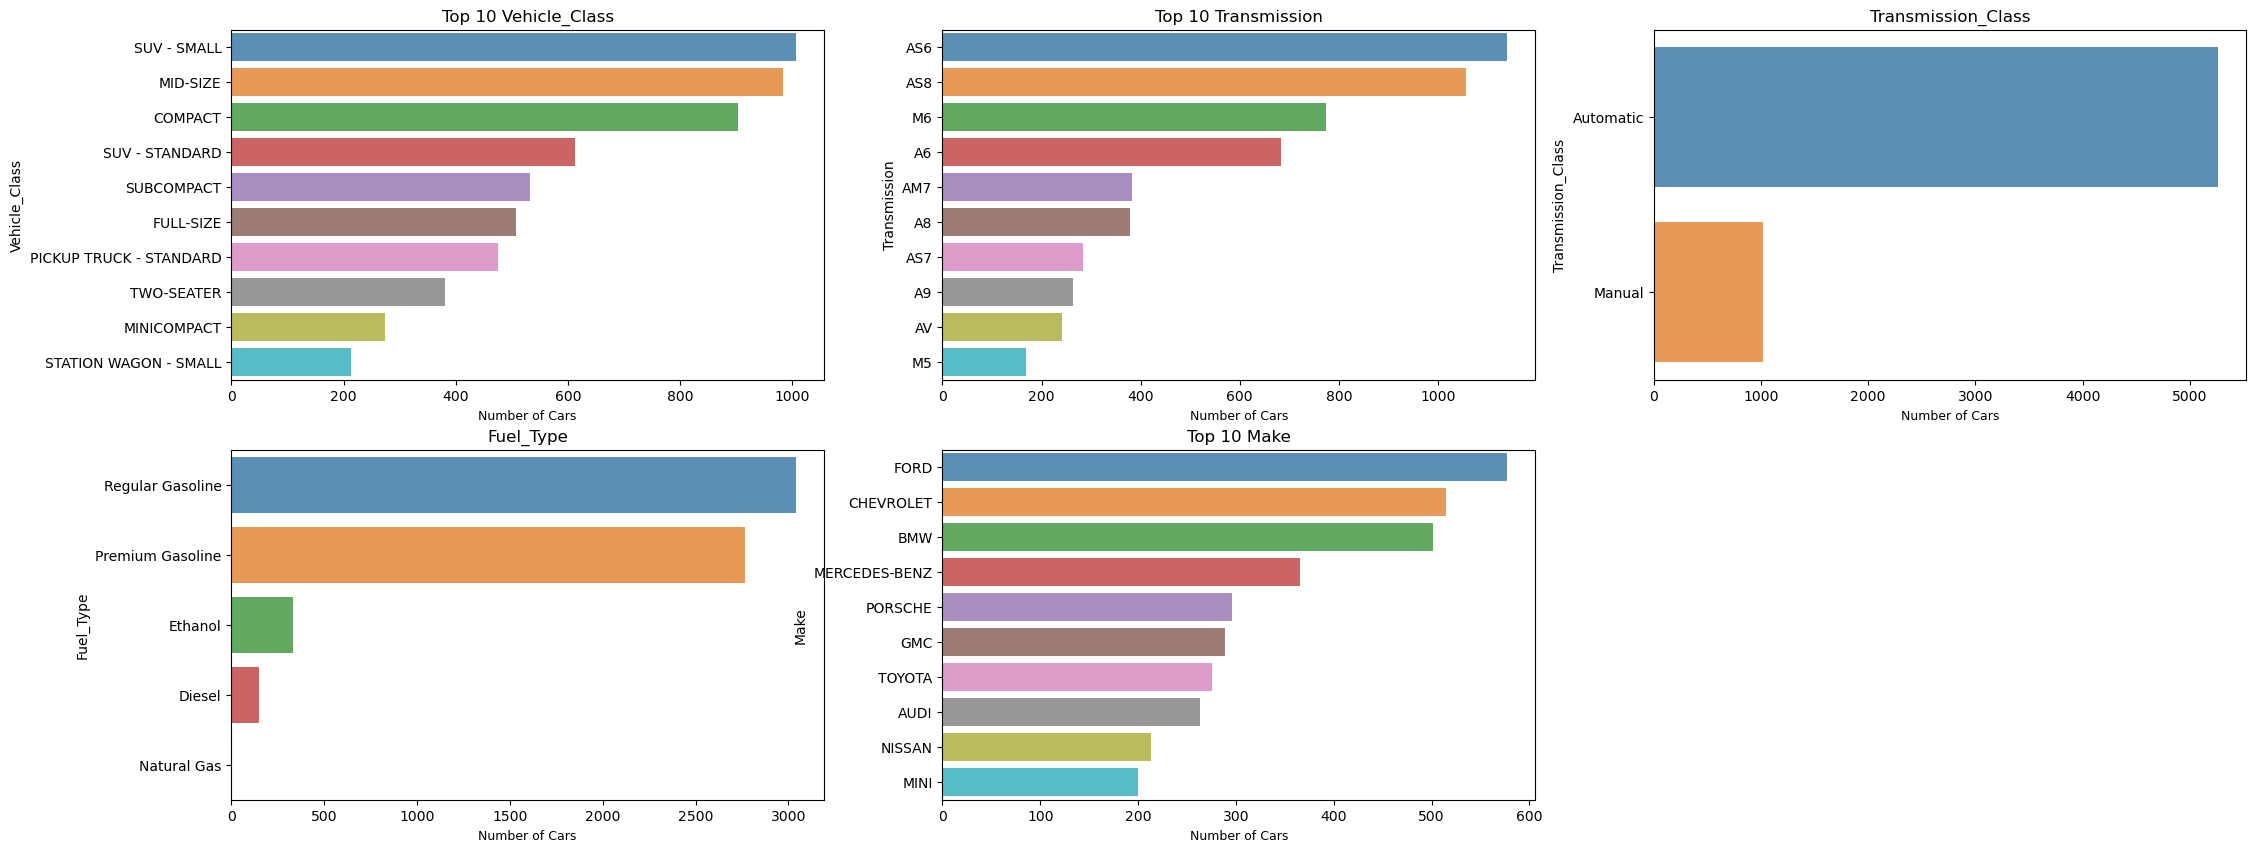

In [23]:
# plot the different categorical variables.
fig,ax= plt.subplots(nrows=2,ncols=3,figsize=(26, 10)) 

for variable, subplot in zip(data_categories1.columns,ax.flatten()):
    cat_count  = data[variable].value_counts()
    cat_count10 = cat_count[:10,]
    z = sns.barplot(x=cat_count10.values, y=cat_count10.index, ax=subplot, alpha=0.8, )
    if cat_count.size > 10:
        z.set_title('Top 10 {}'.format(variable))
    else:
        z.set_title(variable)
    z.set_xlabel('Number of Cars', fontsize=9)
fig.delaxes(ax[1][2])
plt.show()    


- Most of the cars on Canadian roads (used in the dataset) are made by Ford, CHEVROLET and BMW companies.
- SUV-Small, MID_SIZE and COMPACT are the preferred vehicles classes amongst the Canadians.
- More than 5000 cars have automatic transmission mostly AS6 and AS8 transmission types, only 1000 cars have manual transmission.
- Majority of the cars in Canada use Regular Gasoline and Premium Gasoline types of Fuel.

The histograms confirm our findings in Data understanding section.

#### b- Visualizing the quantitative variables:

In [24]:
# create the data_numerical object including the quantitative data.
data_numerical = data.select_dtypes(include=np.number)

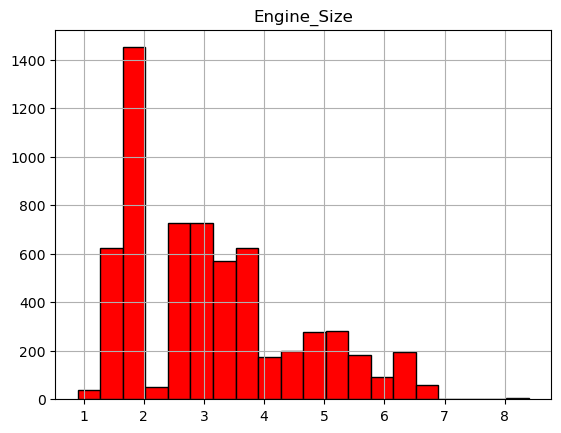

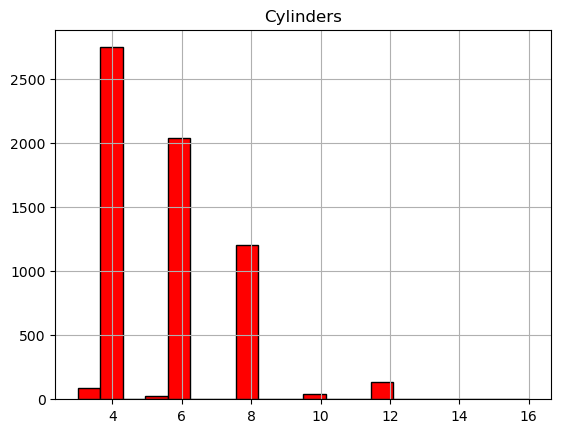

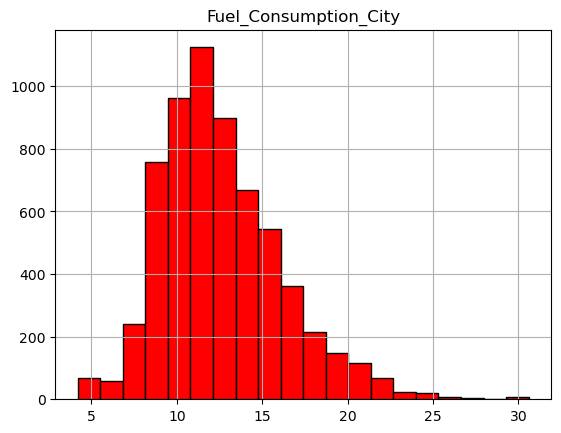

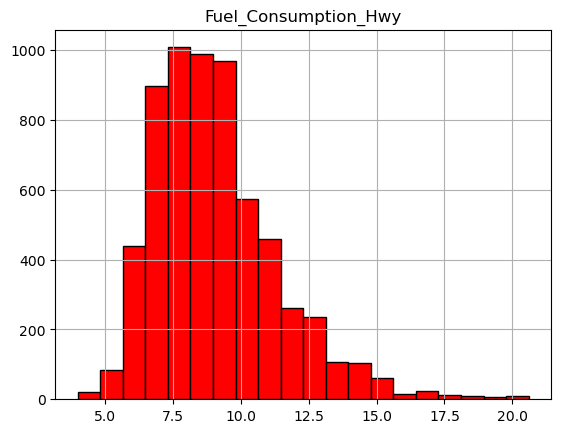

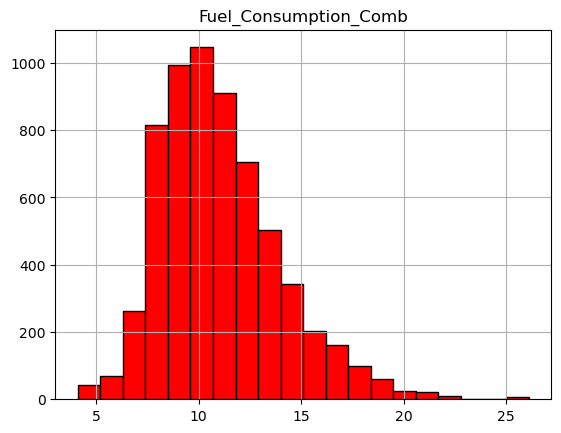

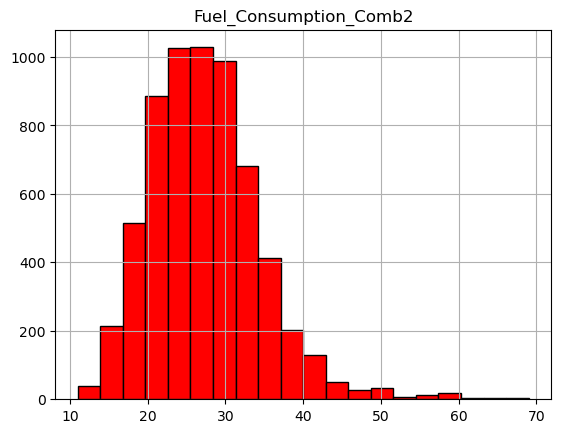

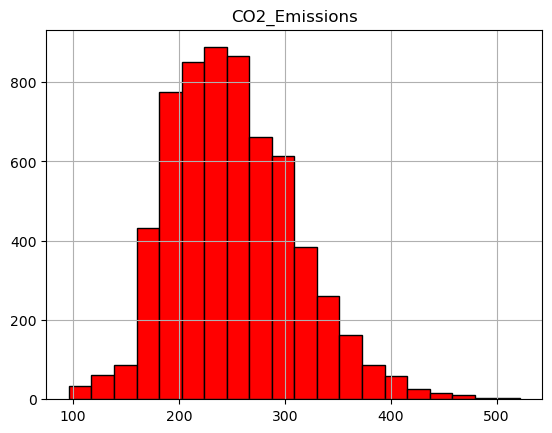

In [25]:
# Histograms for 'Engine Size' 'Cylinders', 'Fuel_Consumption_City', 'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb', 'Fuel_Consumption_Comb2','CO2 Emissions':
for column in data_numerical.columns:
    plt.figure()
    data[column].hist(bins= 20 , color= 'red', edgecolor='black')
    plt.title(column)
    plt.show()


The visualizations confirm our findings in the data understanding. 
- For example, the frequent number of cylinders in the cars is 6, the frequent number of cylinders is 4,  the the frequent proportion of CO2 emitted is more than 245 L/100km and so on.
- The distributions of Fuel Consumption and CO2 Emissions are skewed to the right. This condition can explain that probabilities taper off more slowly for higher values of Fuel Consumption or CO2 Emissions.

### 3.5. Identifying outliers and handling them:

In [26]:

data_numerical=data.select_dtypes(include=np.number)


In [27]:
Q1 = data_numerical.quantile(0.25)
Q3 = data_numerical.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Engine_Size                1.7
Cylinders                  2.0
Fuel_Consumption_City      4.6
Fuel_Consumption_Hwy       2.8
Fuel_Consumption_Comb      3.8
Fuel_Consumption_Comb2    10.0
CO2_Emissions             81.0
dtype: float64


In [28]:
outlier = pd.DataFrame((data_numerical < (Q1 - 1.5 * IQR)) | (data_numerical > (Q3 + 1.5 * IQR)))

for i in outlier.columns:
    print('Total number of Outliers in column {} are {}'.format(i, (len(outlier[outlier[i] == True][i]))))

Total number of Outliers in column Engine_Size are 121
Total number of Outliers in column Cylinders are 177
Total number of Outliers in column Fuel_Consumption_City are 116
Total number of Outliers in column Fuel_Consumption_Hwy are 150
Total number of Outliers in column Fuel_Consumption_Comb are 115
Total number of Outliers in column Fuel_Consumption_Comb2 are 95
Total number of Outliers in column CO2_Emissions are 74


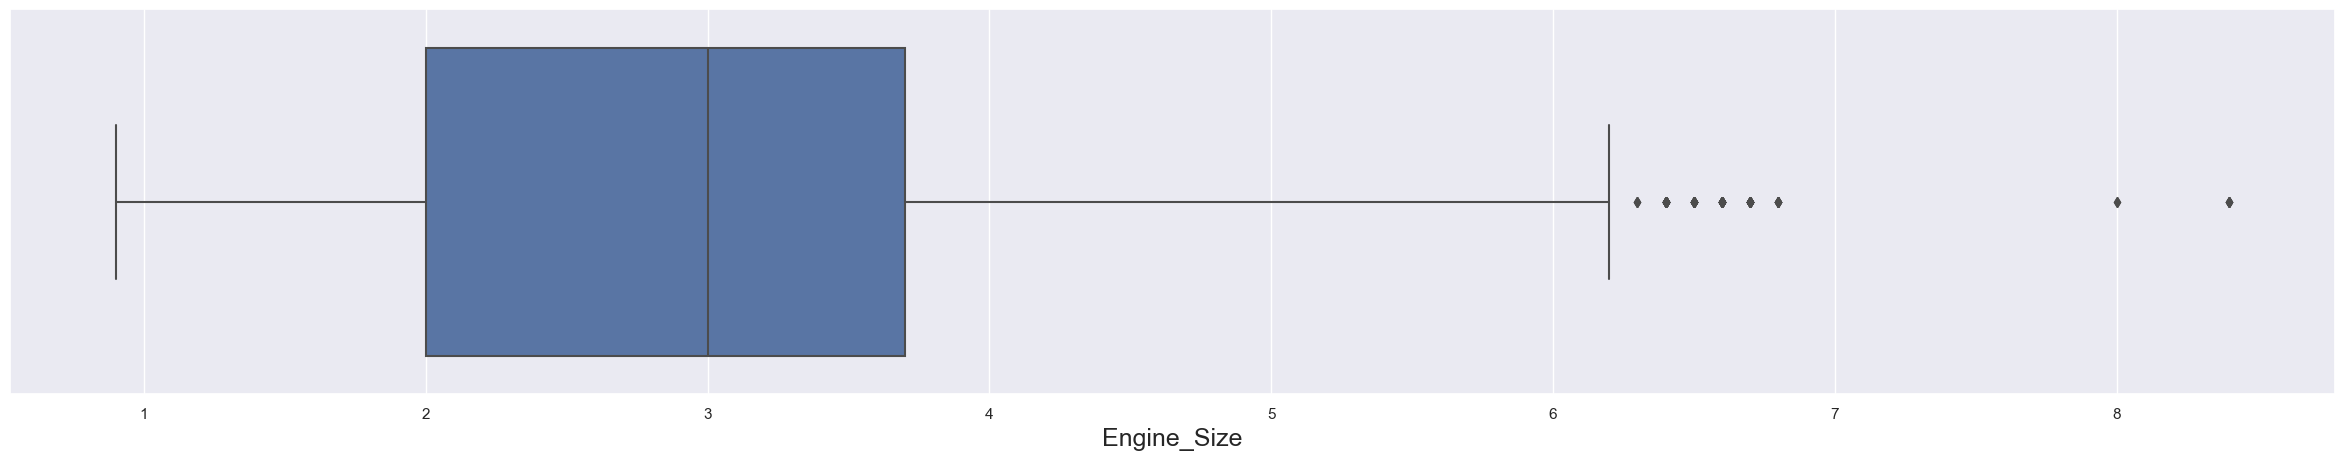

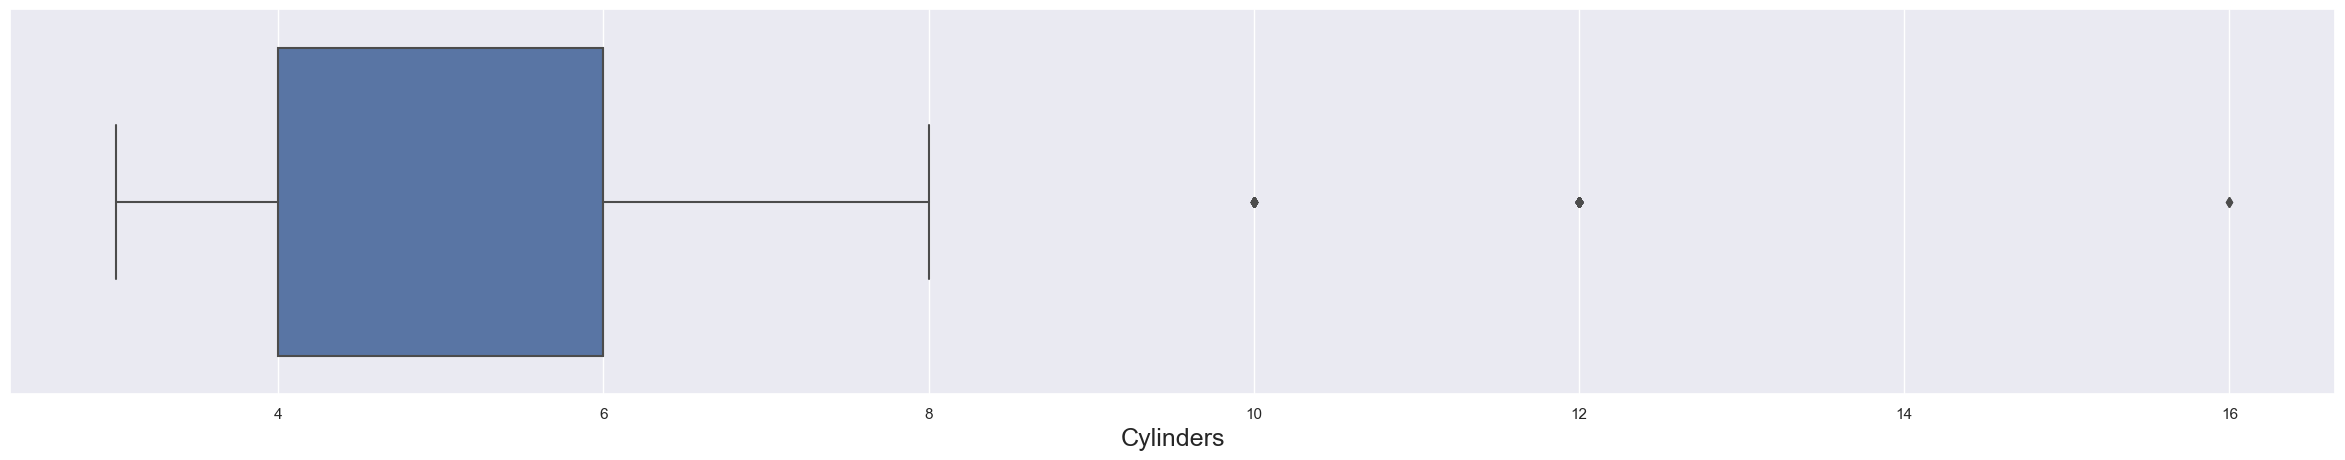

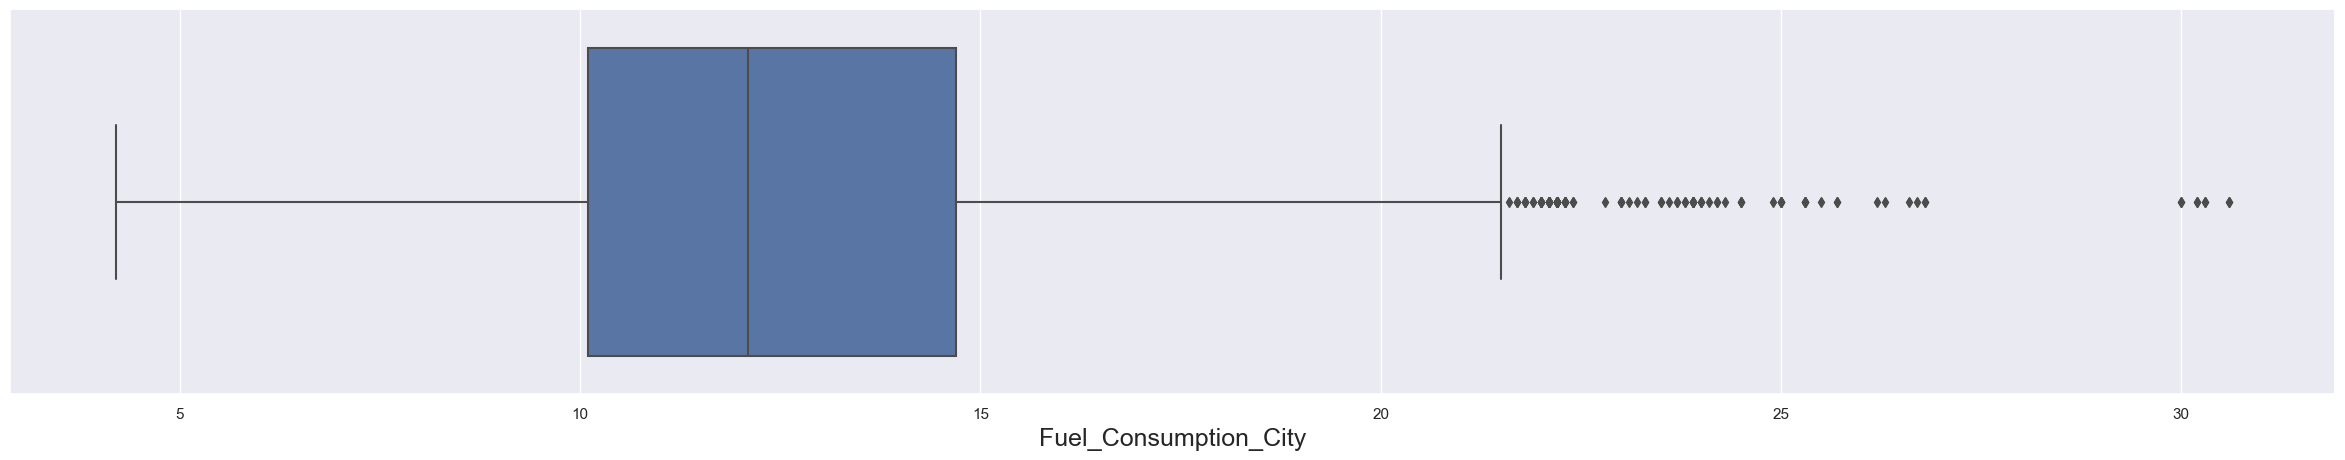

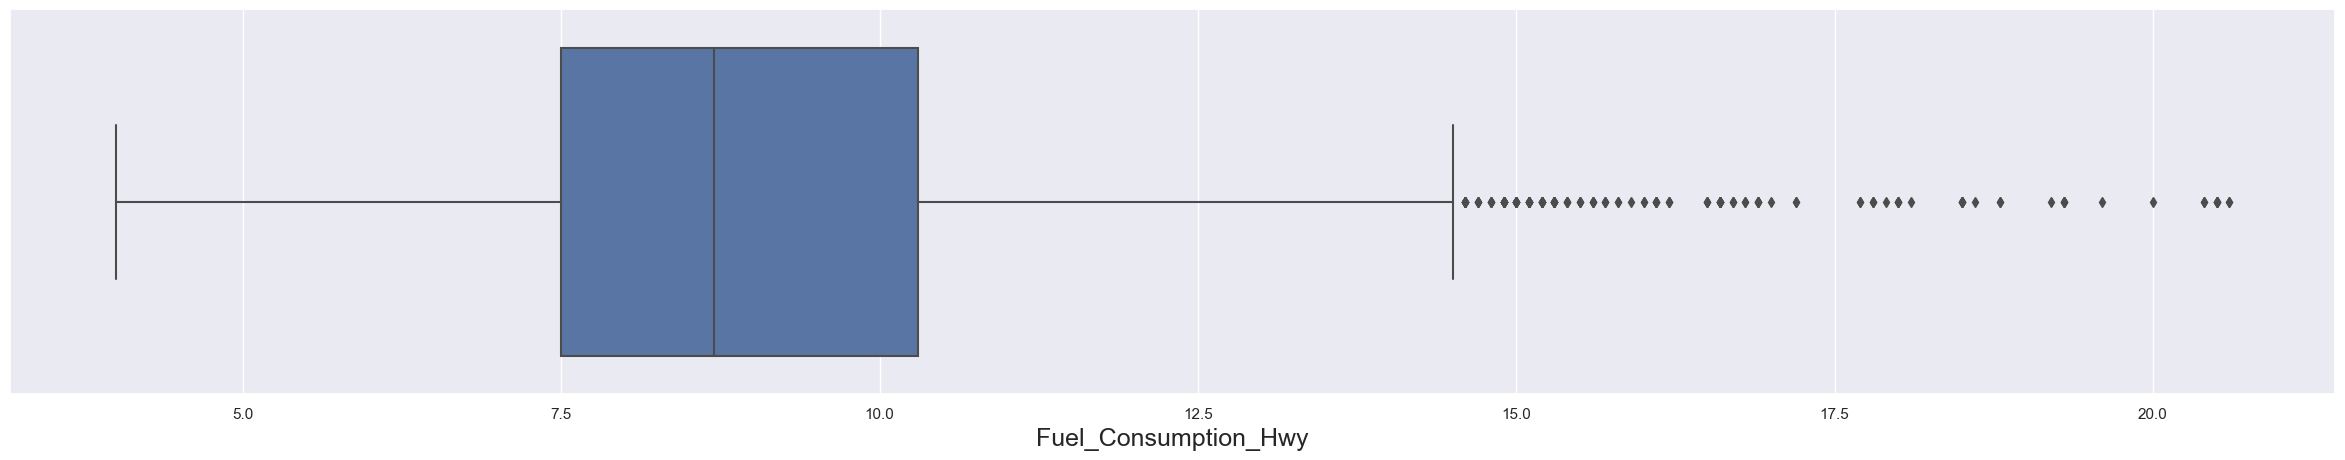

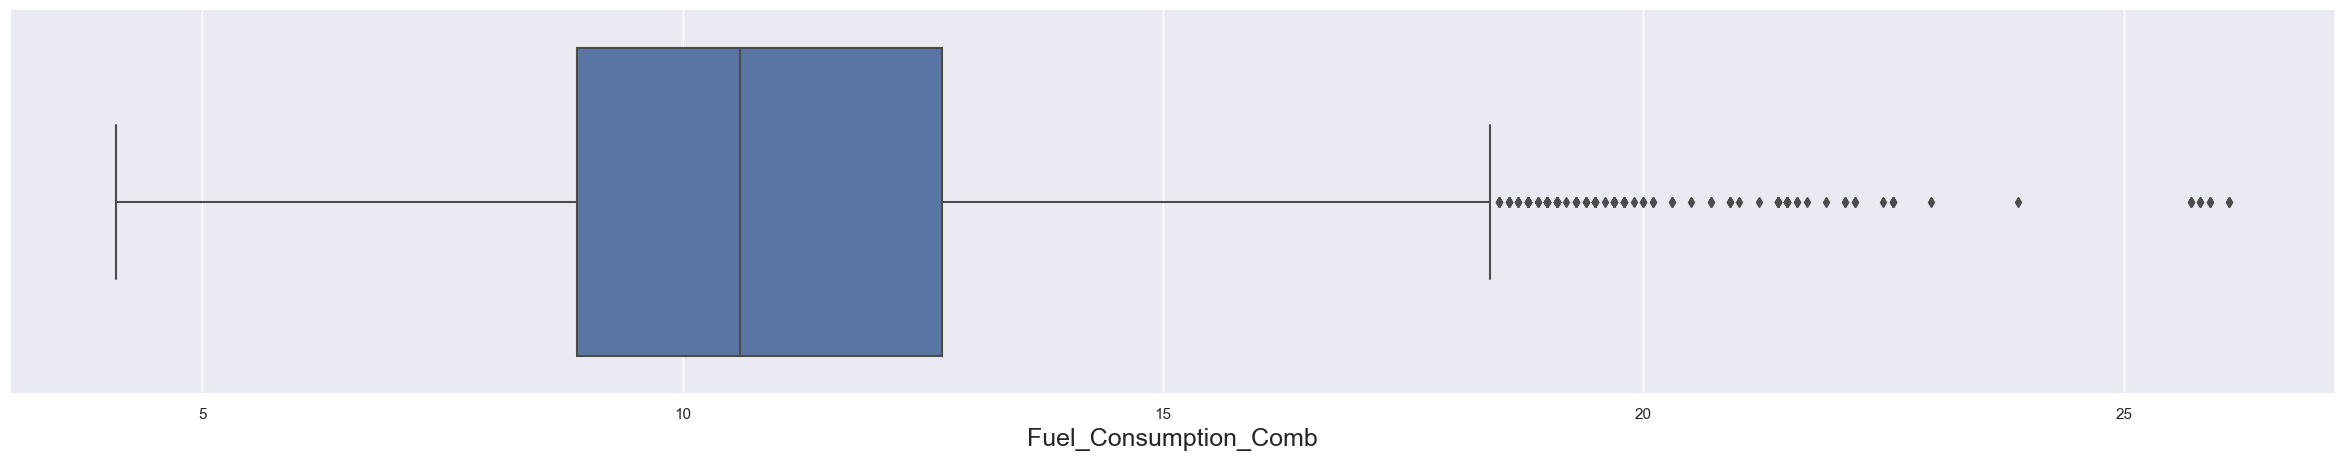

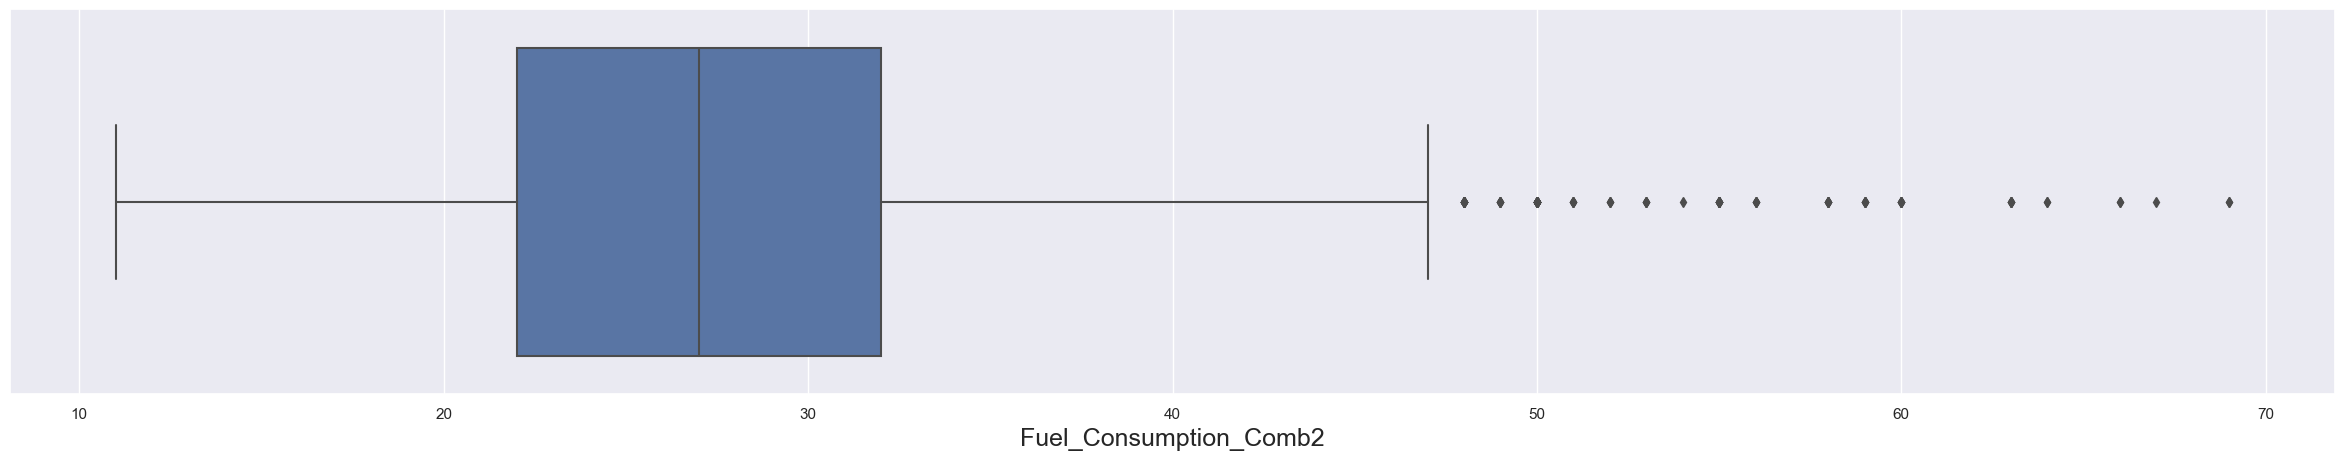

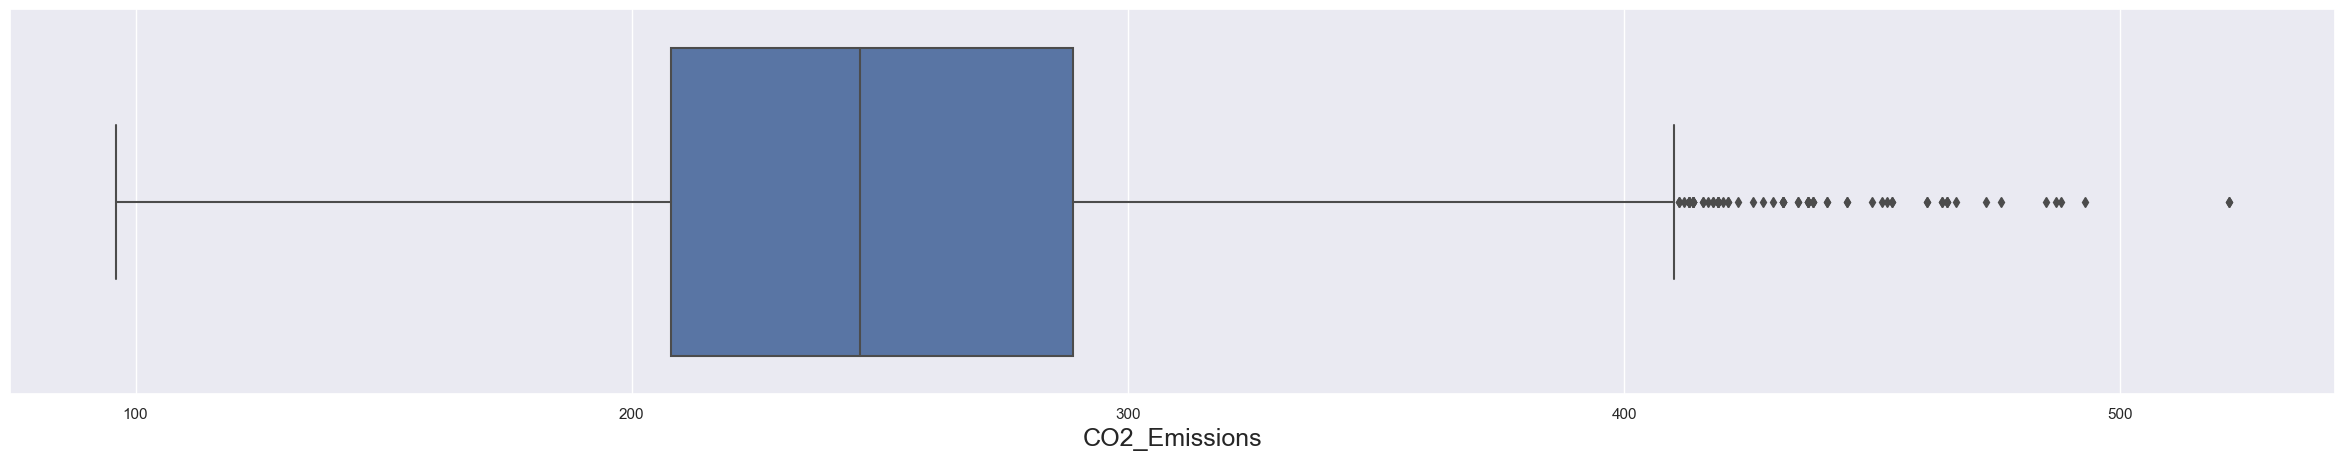

In [29]:
for column in enumerate(data_numerical):
    plt.figure(figsize=(30,5))
    sns.set_theme(style="darkgrid")
    sns.boxplot(x=column[1], data=  data_numerical)
    plt.xlabel(column[1],fontsize=18)
    plt.show()

According to our quantitative data visualizations, those numerical features are not normally distributed.
But, we will do the shapiro test for confirmation before handling outliers.

In [30]:
# Checking the normality of numeric features
stat, p_value = shapiro(data_numerical)

print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.5185067653656006
P-Value: 0.0


A small p-value (less than 0.05) suggests evidence against normality. 
Since, the numerical variables have not normal distributions, we can remove outliers using IQR method.

In [31]:
# Align the indices of data_numerical and outlier
data_numerical, outlier = data_numerical.align(outlier, axis=1, copy=False)


In [32]:
data = data[~((data_numerical < (Q1 - 1.5 * IQR)) |(data_numerical > (Q3 + 1.5 * IQR))).any(axis=1)]
data.reset_index(inplace=True, drop=True)


In [33]:
# check the shape of data after removing outliers:
data.shape

(5816, 12)

After removing outliers, our dataset contains just 5816 rows. Certainly, the descriptive caracteristics such as Mean and Mode will change slightly.

### 3.6.Comparing two scenarios using a PMF:

We will try to compare the PMF of Fuel Consumption in city and Fuel Consumption in highway.

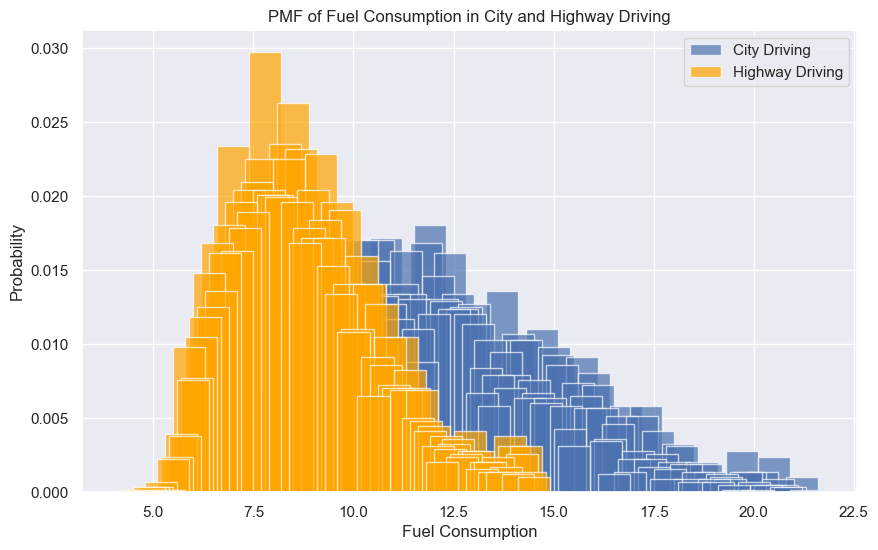

In [34]:
# Extract relevant columns
fuel_city = data['Fuel_Consumption_City']
fuel_hwy = data['Fuel_Consumption_Hwy']

# Calculate PMF for city and highway fuel consumption
city_pmf = fuel_city.value_counts(normalize=True)
hwy_pmf = fuel_hwy.value_counts(normalize=True)

# Create a single plot
plt.figure(figsize=(10, 6))
plt.bar(city_pmf.index, city_pmf.values, label='City Driving', alpha=0.7)
plt.bar(hwy_pmf.index, hwy_pmf.values, color='orange', label='Highway Driving', alpha=0.7)
plt.xlabel('Fuel Consumption')
plt.ylabel('Probability')
plt.title('PMF of Fuel Consumption in City and Highway Driving')
plt.legend()
plt.show()

- Yellow bars are more prominent around the 7.5 to 10 range on the Fuel Consumption axis, indicating higher fuel consumption in city driving.
- Blue bars start becoming noticeable around 10 on the Fuel Consumption axis, showing that highway driving generally consumes less fuel.
- So, we can say that City driving tends to have higher fuel consumption, while highway driving is more fuel-efficient.


### 3.7.Creating a CDF of one of the variables:

We will create a CDF of CO2 Emissions and see how it looks like.

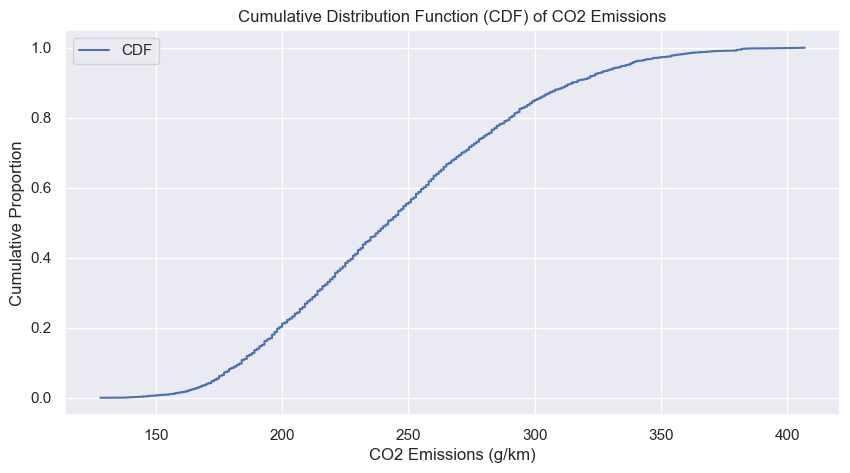

In [35]:

co2_emissions = data['CO2_Emissions']  

# Sort the data
co2_emissions_sorted = np.sort(co2_emissions)

# Calculate the proportional values of samples
p = np.linspace(0, 1, len(co2_emissions_sorted))

# Plot the CDF
plt.figure(figsize=(10, 5))
plt.plot(co2_emissions_sorted, p, label="CDF")
plt.xlabel("CO2 Emissions (g/km)")
plt.ylabel("Cumulative Proportion")
plt.title("Cumulative Distribution Function (CDF) of CO2 Emissions")
plt.grid(True)
plt.legend()
plt.show()

In [36]:

# Mean, Median, Mode and spread after removing outliers
print(f'mean of CO2 Emissions is:{data["CO2_Emissions"].mean()}')
print(f'mode of CO2 Emissions is:{data["CO2_Emissions"].mode()}')
print(f'median of CO2 Emissions is:{data["CO2_Emissions"].median()}')
print(f'spread of CO2 Emissions is:{data["CO2_Emissions"].std()}')

mean of CO2 Emissions is:246.0048143053645
mode of CO2 Emissions is:0    221
1    246
Name: CO2_Emissions, dtype: int64
median of CO2 Emissions is:242.0
spread of CO2 Emissions is:50.20869236011196


- The x-axis represents the CO2 emissions.It ranges from approximately 150 g/km to 400 g/km. 
About 50% of vehicles emet less or equal to 242 g/km CO2.


- The curve is steeper when CO2 emissions are nearly between 180 g/km and 300 g/km, that means that data points are more concentrated there (around the median). Then, it becomes flatter when CO2 Emissions exceeds 300g/km indicating wider spread of CO2 Emissions values. We can see that Mode(221)< Median(242) < Mean(246); 


The mean is the largest, while the mode is the smallest thus CO2_Emissions is positively skewed which implies that most of the CO2 Emissions are less than the average CO2 Emissions.


- This CDF give us an overview of the CO2 Emissions variations. We may later try to find correlations between this feature and the other variables.

### 3.8. Plotting an analytical distribution:

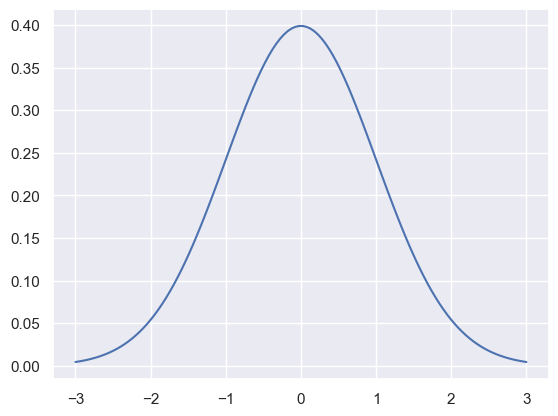

In [37]:
def gaussian(x, mu, sig):
    return (1.0 / (np.sqrt(2.0 * np.pi) * sig)) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)

# Define the range of x values
x_values = np.linspace(-3, 3, 120)

# Define the parameters for the Gaussian function (mu and sigma)
mu = 0
sig = 1

# Plot the Gaussian distribution
plt.plot(x_values, gaussian(x_values, mu, sig))
plt.show()

The normal distribution is often used to model naturally occurring phenomena, it can be a good model for the distribution of CO2 Emissions by vehicles chosen randomly.

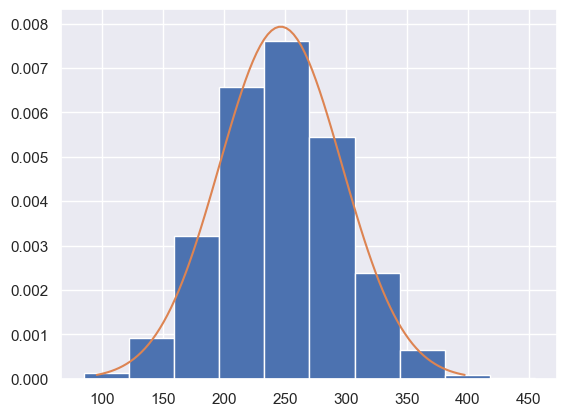

In [38]:
def gaussian(x, mu, sig):
    return (1.0 / (np.sqrt(2.0 * np.pi) * sig)) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)

# Define the parameters for the Gaussian function (mu and sigma)
mu = 246.63 # mean of CO2 Emissions
sig = 50.3  # spread of CO2 Emissions

# Define randomly my x_values 
x_values = np.random.normal(mu, sig, 4991)

# Plot the Gaussian distribution
plt.hist(x_values,  density=True)

# Generate a range of x values for the Gaussian curve
x_range = np.linspace(mu - 3*sig, mu + 3*sig, 100)

# Plot the Gaussian curve
plt.plot(x_range, gaussian(x_range, mu, sig))
plt.show()

Most of the observed CO2 emissions fall within a range centered around 150-250 units on the x-axis.
This suggests that these emission levels are common.
As we move away from the center, the frequency of occurrence decreases.

The normal distribution fit helps us understand the typical behavior of CO2 emissions in the dataset.
Fitting data to a normal distribution allows us to make certain assumptions and predictions. However, the actual distribution of CO2 emissions may deviate from a perfect normal distribution.

### 3.9. Correlation between all numerical features:

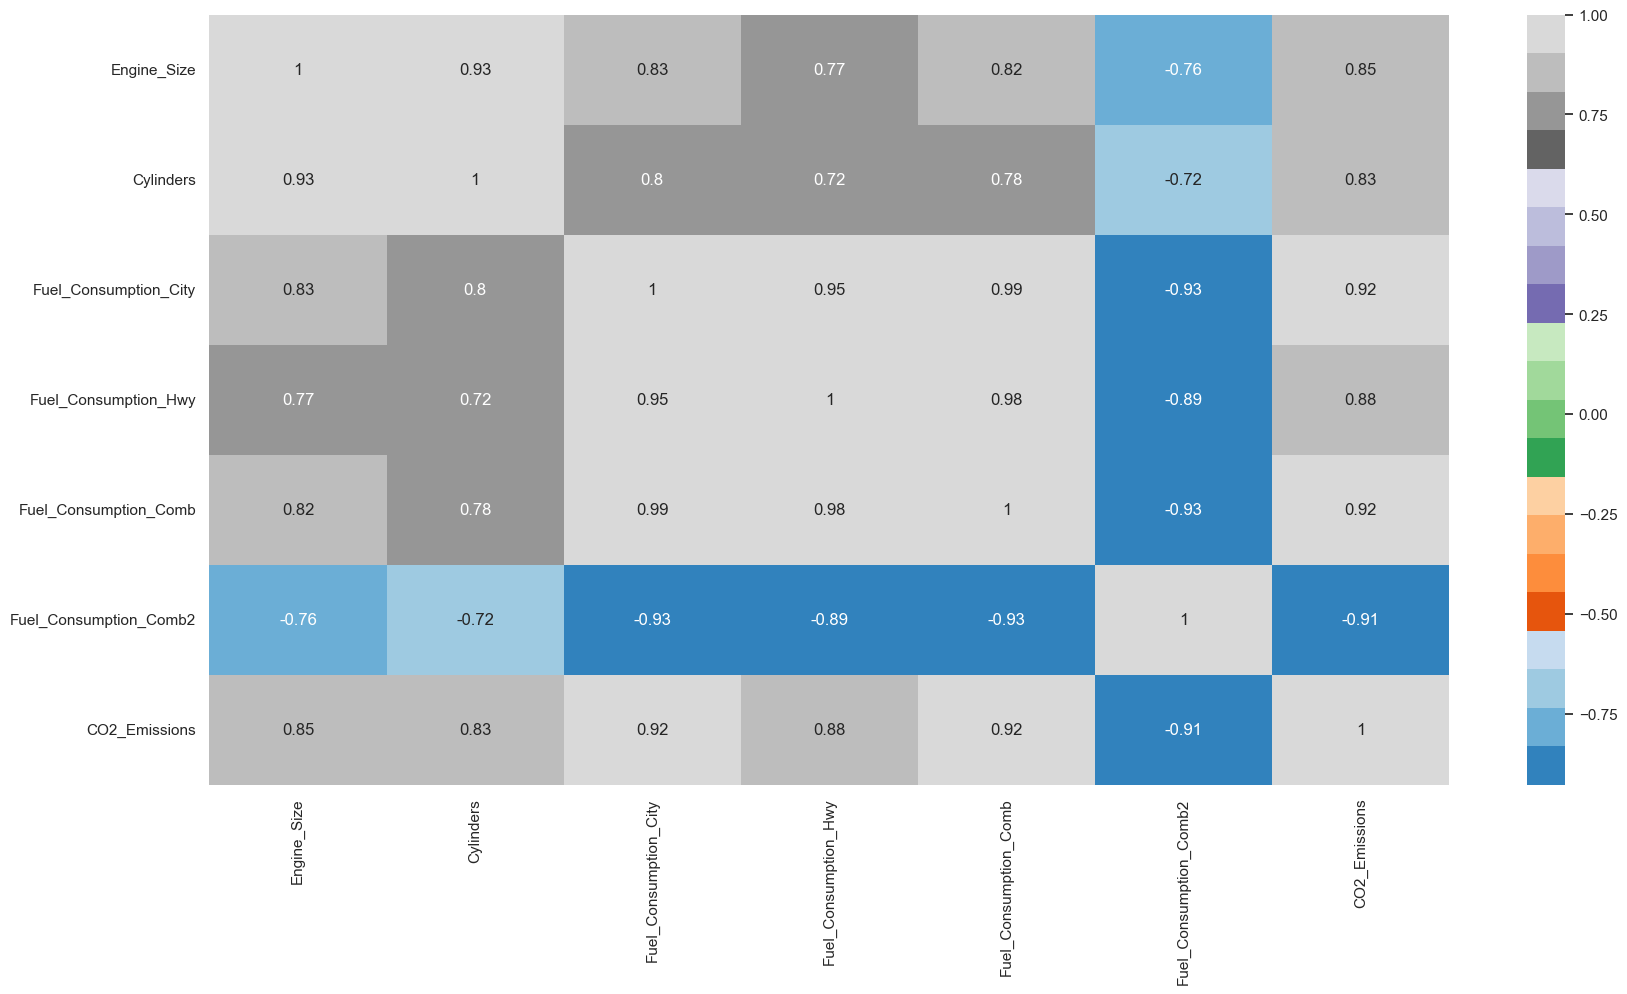

In [39]:
plt.figure(figsize=(20,10))

corr =  data_numerical.corr()

corr =data_numerical.corr(method='pearson')
sns.heatmap(corr, annot=True,cmap='tab20c')
plt.show()


- Engine Size and Cylinders variables exhibit a strong positive correlation. When the engine size increases, the number of cylinders tends to increase as well. This makes sense because larger engines often have more cylinders to accommodate greater power output and smoother operation.


- There is a positive correlation between engine size and fuel consumption. Larger engines typically consume more fuel because they require more energy to operate. High-performance or larger vehicles often have bigger engines, leading to increased fuel consumption.

- Similar to the engine size, the number of cylinders also correlates positively with fuel consumption. More cylinders usually mean a larger engine, which, in turn, requires more fuel.


- There is a high positive correlation of CO2_Emissions with Fuel_Consumption_Comb, Fuel_Consumption_City and Fuel_Consumption_Hwy . When a car consumes more fuel (higher fuel consumption), it tends to emit more CO2 into the atmosphere. This aligns with the understanding that burning fuel releases carbon dioxide (CO2) as a byproduct. 


- Fuel_Consumption_Comb2 has a high negative correaltion with CO2_Emissions, Fuel_Consumption_Comb, Fuel_Consumption_City and Fuel_Consumption_City. The Fuel_Consumption_Comb2 represents the miles driven per 1 galon of Fuel. It is kind of fuel efficiency of the car.  That suggests that some cars may have better fuel efficiency, cleaner combustion or more efficient engine designs.




### 3.10. Creating scatter plots comparing two variables:

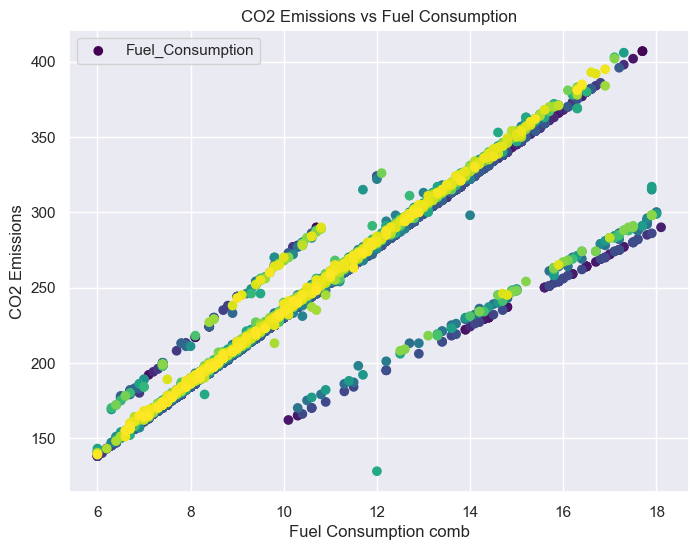

In [40]:
plt.figure(figsize=(8, 6))

plt.scatter(x=data['Fuel_Consumption_Comb'], y=data['CO2_Emissions'], c=data.index, cmap='viridis')
#plt.scatter(x=data['CO2_Emissions'], y=data['Fuel_Consumption_Comb'])
legend_labels= ['Fuel_Consumption', 'CO2_Emissions']
plt.xlabel('Fuel Consumption comb')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions vs Fuel Consumption' )
plt.legend(labels= legend_labels)
plt.grid(True)
#plt.tight_layout()
plt.show()

In [41]:
# Calculate covariance
cov_matrix = data[['CO2_Emissions', 'Fuel_Consumption_Comb']].cov()
print("Covariance matrix:\n", cov_matrix)
# calculate correlation
corr_matrix = data[['CO2_Emissions', 'Fuel_Consumption_Comb']].corr()
print("Correlation matrix:\n", corr_matrix)

Covariance matrix:
                        CO2_Emissions  Fuel_Consumption_Comb
CO2_Emissions            2520.912789             109.895721
Fuel_Consumption_Comb     109.895721               5.659955
Correlation matrix:
                        CO2_Emissions  Fuel_Consumption_Comb
CO2_Emissions               1.000000               0.920016
Fuel_Consumption_Comb       0.920016               1.000000


-  The value 109.89 represents the covariance between CO2 Emissions and Fuel Consumption combined. A positive covariance indicates that the two variables tend to increase or decrease together. So, we can say that as Fuel Consumption in city roads and highway increases, the CO2 Emissions increases also.  
- The Pearson’s correlation coefficient measures the strength and direction of the linear relationship between two variables.
A Pearson’s correlation of 0.92 between CO2 Emissions and Fuel Consumption combined is very high, suggesting a strong positive linear relationship. This means that as the Fuel Consumption increases, the CO2 Emissions also tend to increase, and vice versa. However, correlation does not imply causation, so while these two variables move together, it doesn’t definitively mean that one causes the other to move. Other factors could be involved. 

####  Conducting a test on my hypothesis (correlation CO2 Emissions_Fuel Efficiency) using the Pearson's correlation :

In [42]:
# Calculate Pearson's correlation 
corr, p_value = pearsonr(data['CO2_Emissions'], data['Fuel_Consumption_Comb'])

print(f"Pearson's correlation: {corr}")
print(f"P-value: {p_value}")

Pearson's correlation: 0.9200160011416344
P-value: 0.0


A p_value close to 0.0 indicates that there is a strong evidence that the correlation between CO2 Emissions and Fuel Efficiency is statistically significant, and the likelihood that the observed correlation occurred by chance is extremely low.

## 4.Regression analysis on  one dependent variable and multiple explanatory variables.

We will try to conduct a regression analysis on CO2 Emissions as dependant variable and Fuel_Consumption_City, Fuel_Consumption_Hwy and Fuel_Consumption_Comb as independant variables.

In [54]:
# Define dependent variable (Y) and explanatory variables (X)
X = data[["Fuel_Consumption_City", "Fuel_Consumption_Hwy", "Fuel_Consumption_Comb"]]
Y = data["CO2_Emissions"]

# Add constant term for intercept
X = sm.add_constant(X)

# Fit the multiple linear regression model: Ordinary Least Squares (OLS) regression. 
model = sm.OLS(Y, X).fit()

# Print summary of regression results
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:          CO2_Emissions   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                 1.068e+04
Date:                Fri, 01 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:07:38   Log-Likelihood:                -25580.
No. Observations:                5816   AIC:                         5.117e+04
Df Residuals:                    5812   BIC:                         5.119e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    38.21

The variable we are trying to predict or explain is CO2 Emissions.


- R-squared is equal to 0.846, indicating that approximately 84.6% of the variability in CO2 emissions is explained by the model.

- F-statistic: A test of overall significance of the model. The large value (1.068e+04) and low p-value (0.00) suggest that the model is statistically significant.

- For the Coefficients:
 1. The Coefficient for the city fuel consumption is approximately -2.08, but it is not significant in our predictions (p-value = 0.657).
 2. The Coefficient for the highway fuel consumption is approximately 1.17, but it is not significant (p-value = 0.675).
 3. The Coefficient for the combined fuel consumption is approximately 16.74, and it is significant (p-value = 0.006), that means with one unit increase in Fuel consumed in city roads and highway (combined) leads to 16.74 units increase in CO2 Emissions.

- Low p_values of Omnibus and JB tests suggests non-normality of residuals.
- Durbin-Watson: A test for autocorrelation. A value close to 2 indicates no significant autocorrelation.
- Skewness (Skew): Measures the symmetry of residuals. Negative skewness indicates left skew.
- Kurtosis: Measures the peakedness of residuals. High kurtosis (15.024) suggests heavy tails.
- Cond. No.: A measure of multicollinearity. A high value (552) indicates potential collinearity.


In summary, the model explains a significant portion of the variability in CO2 emissions. The combined fuel consumption has a significant effect, while city and highway fuel consumption do not.

Let's try now to conduct a regression analysis of the same variable CO2 Emissions with approximatly all the other variables as explanatory variables, interpret it and compare the two models:

Before doing that, we will conduct some modifications. 

In [44]:
# Create a new feature Make_Type by combining various car companies(Make) on the basis of their functionality
# There are 42 unique Car Companies. We will divide these companies into Luxury, Sports, Premium and General cars
data['Make_Type'] = data['Make'].replace(['BUGATTI', 'PORSCHE', 'MASERATI', 'ASTON MARTIN', 'LAMBORGHINI', 'JAGUAR','SRT'], 'Sports')
data['Make_Type'] = data['Make_Type'].replace(['ALFA ROMEO', 'AUDI', 'BMW', 'BUICK', 'CADILLAC', 'CHRYSLER', 'DODGE', 'GMC','INFINITI', 'JEEP', 'LAND ROVER', 'LEXUS', 'MERCEDES-BENZ','MINI', 'SMART', 'VOLVO'],'Premium')
data['Make_Type'] = data['Make_Type'].replace(['ACURA', 'BENTLEY', 'LINCOLN', 'ROLLS-ROYCE',  'GENESIS'], 'Luxury')
data['Make_Type'] = data['Make_Type'].replace(['CHEVROLET', 'FIAT', 'FORD', 'KIA', 'HONDA', 'HYUNDAI', 'MAZDA', 'MITSUBISHI','NISSAN', 'RAM', 'SCION', 'SUBARU', 'TOYOTA','VOLKSWAGEN'],'General')

In [45]:
# Create a new feature Vehicle_Class_Type by combining various Vehicle_Class on the basis of their size
# There are 16 unique Vehicle Classes. We will divide them into Hatchback, Sedan, SUV and Truck.
data['Vehicle_Class_Type'] = data['Vehicle_Class'].replace(['COMPACT', 'MINICOMPACT', 'SUBCOMPACT'], 'Hatchback')
data['Vehicle_Class_Type'] = data['Vehicle_Class_Type'].replace(['MID-SIZE', 'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL', 'STATION WAGON - MID-SIZE'],'Sedan')
data['Vehicle_Class_Type'] = data['Vehicle_Class_Type'].replace(['SUV - SMALL', 'SUV - STANDARD', 'MINIVAN'],  'SUV')
data['Vehicle_Class_Type'] = data['Vehicle_Class_Type'].replace(['VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD', 'SPECIAL PURPOSE VEHICLE', 'PICKUP TRUCK - SMALL'], 'Truck')

In [46]:
data.head()

,Make,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Type,Transmission_Class,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb2,CO2_Emissions,Make_Type,Vehicle_Class_Type
0,ACURA,COMPACT,2.0,4,AS5,Premium Gasoline,Automatic,9.9,6.7,8.5,33,196,Luxury,Hatchback
1,ACURA,COMPACT,2.4,4,M6,Premium Gasoline,Manual,11.2,7.7,9.6,29,221,Luxury,Hatchback
2,ACURA,SUV - SMALL,3.5,6,AS6,Premium Gasoline,Automatic,12.7,9.1,11.1,25,255,Luxury,SUV
3,ACURA,SUV - SMALL,3.5,6,AS6,Premium Gasoline,Automatic,12.1,8.7,10.6,27,244,Luxury,SUV
4,ACURA,MID-SIZE,3.5,6,AS6,Premium Gasoline,Automatic,11.9,7.7,10.0,28,230,Luxury,Sedan


In [47]:
# drop the columns 'Make','Vehicle_Class' and 'Transmission'.
data.drop(data[['Make','Vehicle_Class','Transmission']], inplace=True, axis=1)

data.head()

,Engine_Size,Cylinders,Fuel_Type,Transmission_Class,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb2,CO2_Emissions,Make_Type,Vehicle_Class_Type
0,2.0,4,Premium Gasoline,Automatic,9.9,6.7,8.5,33,196,Luxury,Hatchback
1,2.4,4,Premium Gasoline,Manual,11.2,7.7,9.6,29,221,Luxury,Hatchback
2,3.5,6,Premium Gasoline,Automatic,12.7,9.1,11.1,25,255,Luxury,SUV
3,3.5,6,Premium Gasoline,Automatic,12.1,8.7,10.6,27,244,Luxury,SUV
4,3.5,6,Premium Gasoline,Automatic,11.9,7.7,10.0,28,230,Luxury,Sedan


In [48]:
# categorical encoding
data_dummies = pd.get_dummies(data = data[["Fuel_Type",  "Make_Type", "Transmission_Class", "Vehicle_Class_Type"]], drop_first = True)

data_numerical=data.select_dtypes(include=np.number)

data_comb = pd.concat([data_numerical, data_dummies], axis = 1)
data_comb = data_comb.astype(float)
data_comb.head()

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb2,CO2_Emissions,Fuel_Type_Ethanol,Fuel_Type_Natural Gas,Fuel_Type_Premium Gasoline,Fuel_Type_Regular Gasoline,Make_Type_Luxury,Make_Type_Premium,Make_Type_Sports,Transmission_Class_Manual,Vehicle_Class_Type_SUV,Vehicle_Class_Type_Sedan,Vehicle_Class_Type_Truck
0,2.0,4.0,9.9,6.7,8.5,33.0,196.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.4,4.0,11.2,7.7,9.6,29.0,221.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3.5,6.0,12.7,9.1,11.1,25.0,255.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.5,6.0,12.1,8.7,10.6,27.0,244.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3.5,6.0,11.9,7.7,10.0,28.0,230.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [49]:
#Multiple Linear Regression - Basic Model
X = data_comb.drop(['CO2_Emissions'], axis=1)
y = data_comb['CO2_Emissions']

In [50]:
X = sm.add_constant(X)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [52]:
MLR_model1 = sm.OLS(y_train, X_train).fit()
MLR_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CO2_Emissions   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 4.329e+04
Date:                Fri, 01 Mar 2024   Prob (F-statistic):               0.00
Time:                        09:45:43   Log-Likelihood:                -11246.
No. Observations:                4071   AIC:                         2.253e+04
Df Residuals:                    4054   BIC:                         2.263e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         81.6004      2.439     33.450      0.000      76.818      86.383
Engine_Size                    0.2554      0.162      1.581      0.114      -0.061       0.572
Cylinders                      0.0835      0.127      0.656      0.512      -0.166       0.333
Fuel_Consumption_City          5.7018      0.812      7.023      0.000       4.110       7.294
Fuel_Consumption_Hwy           5.4023      0.677      7.976      0.000       4.074       6.730
Fuel_Consumption_Comb          9.8196      1.476      6.655      0.000       6.927      12.713
Fuel_Consumption_Comb2        -0.8657      0.043    -20.142      0.000      -0.950      -0.781
Fuel_Type_Ethanol           -134.3292      0.593   -226.630      0.000    -135.491    -133.167
Fuel_Type_Natural Gas       3.911e-14   6.93e-15      5.641      0.000    2.55e-14    5.27e-14
Fuel_Type_Premium Gasoline   -31.8549      0.435    -73.296      0.000     -32.707     -31.003
Fuel_Type_Regular Gasoline   -31.7479      0.410    -77.485      0.000     -32.551     -30.945
Make_Type_Luxury               0.0166      0.394      0.042      0.966      -0.757       0.790
Make_Type_Premium             -0.6342      0.164     -3.875      0.000      -0.955      -0.313
Make_Type_Sports              -0.4593      0.277     -1.657      0.098      -1.003       0.084
Transmission_Class_Manual     -0.2316      0.172     -1.346      0.178      -0.569       0.106
Vehicle_Class_Type_SUV        -0.4668      0.210     -2.220      0.026      -0.879      -0.055
Vehicle_Class_Type_Sedan       0.0822      0.160      0.514      0.607      -0.231       0.396
Vehicle_Class_Type_Truck       0.1025      0.308      0.333      0.739      -0.502       0.707
==============================================================================
Omnibus:                     1183.804   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58775.069
Skew:                           0.597   Prob(JB):                         0.00
Kurtosis:                      21.576   Cond. No.                     7.65e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.05e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""


- About 99.4% (R squared = 0.994) of the variation in CO2 emissions can be explained by the independent variables in our model.
- The const coefficient (65.6774) represents the baseline CO2 emissions when all other predictors are zero.

- The coefficient for Engine_Size is approximately -0.3339. This means that for every one-unit increase in engine size, CO2 emissions decrease by approximately 0.3339 units. (opposite of our findings in the correlations)

-  The p-value for Fuel_Consumption_Comb2 is 0.000, indicating that it is significant in CO2 emissions analysis.
- The Fuel_Consumption_Comb coefficient (12.6574) suggests that higher combined fuel consumption leads to increased CO2 emissions. (confirms our findings in correlations)

- The Fuel_Type_Ethanol coefficient (-129.4392) indicates that using ethanol as fuel significantly reduces CO2 emissions.

- Using Fuel_Type Regular Gasoline and Premium Gasoline and reduces also CO2 emissions (coeff= -31).

- The Make_Type_Premium coefficient (-0.4541) suggests that premium car makes have slightly lower CO2 emissions.


- The Vehicle_Class_Type_Truck coefficient (1.2476) implies that trucks have higher CO2 emissions compared to other vehicle types.

Finally, the independants variables that significantly (P<0.05) explained the variations in CO2 emissions are: Fuel_Consumption_City, Fuel_Consumption_Hwy, Fuel_Consumption_Comb, Fuel_Consumption_Comb2, Fuel_Type_Ethanol, Make_Type_Natural Gaz, Fuel_Type_Regular Gasoline, Fuel_Type_Premium Gasoline, Make_Type_Premium, Vehicle_Class_Type_SUV.


If we compare the two models, The second model is more convenient for our analysis because the independent variables used can explain 99.5% of the variation in dioxide of carbone emissions compared to 84.6% in the first model.


## Conclusion

***Statistical/Hypothetical Question***:


In this project we tried to answer the question if  CO2 Emissions in the environment by vehicles are strongly correlated to their Fuel consumption proportions and or to other related factors. Also, We want to know if it is possible to create a model to explain the carbone dioxide emissions variations and the significance of each factor in that.   

 ***Outcome of your EDA***:
 
 
 The EDA helped us to understand our dataset, identify the different correlations and determine the more convenient methods and statistical model (regression analysis) to test our hypothesis.
  
For instance, we discovered that canadians prefer Premium and General Make_Type (Ford, CHEVROLET and BMW companies), SUV vehicle classes and Regular and Premium Gasoline  types of Fuel.

The statistical model created (multiple linear regression) has shown that Fuel Consumption, Fuel_Type, Make_Type, Vehicle_Class are significant features in CO2 emissions variations in the environment.
The model has shown also that the canadians preferences are considerable of CO2 emissions in the environment, that can had been done consciously or no. 


***What do you feel was missed during the analysis?***


Conducting more visualizations between the target variable (CO2 Emissions) and the other explanatory variable would be more useful. 



***Were there any variables you felt could have helped in the analysis?***


In the first model, I used just Fuel consumption as independat variable. The model has an R squared of 0.846. But, I thought that engine size and number of cylinders would extremply help in our analysis. That's why I tried to create another model including these variables.




***Were there any assumptions made you felt were incorrect?***

The histograms have shown that engine size and number of cylinders are correlated with CO2 emissions.
However, according to the model, the effect of  engine size and number of cylinders are not significant explanatory factors in our regression analysis compared to fuel consumption and Fuel type.

I am not sure if there are other models that can predict better the outcomes that we need.

***What challenges did you face, what did you not fully understand?***


In the features engeneering, we must have knowledge by the context of the dataset, in this case, for example the different vehicle class types, Make types.                          

